In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output
import os

# IMT 3860: Extracción y Transformación de Datos.

TALLER 2: **Fecha de entrega: domingo 14 de mayo de 2023, 23:59 hrs., enviar Notebook via Canvas con el código ejecutado.**

## 1. Introducción.

Las organizaciones (y el mundo) generan y almacenan datos a través de distintos métodos y herramientas de software, cada uno con sus propios formatos y ubicaciones. El proceso ETL (o a veces, ELT) se refiere al desarrollo de pipelinas para la integración, estructuración y almacenamiento de datos provenientes de múltiples fuentes. 

La primera etapa de **extracción**, implica identificar las fuentes de datos requeridas (software, IoT, data de clientes, RRSS, web analytics, etc) y el formato de dichos datos, y luego obtener en forma automatizada los datos desde la fuente original, hacia un repositorio temporal donde se realiza la  **transformación**. Esta etapa se refiere a la conversión de la data en un formato y estructura apropiada para el análisis y modelamiento.


## 2. Extracción de Datos.

Los datos de interés para un problema de ciencia de datos pueden estar ubicados en diversas fuentes: archivos en almacenamiento local o remoto, servidores de bases de datos, y la web. 

En la web, la transmisión de información se realiza mediante el protocolo HTTP (Hypertext Transfer Protocol), diseñado para la comunicación entre los navegadores y servidores web. Sigue el clásico modelo cliente-servidor, en el que un cliente establece una conexión, realizando una petición a un servidor y espera una respuesta del mismo.

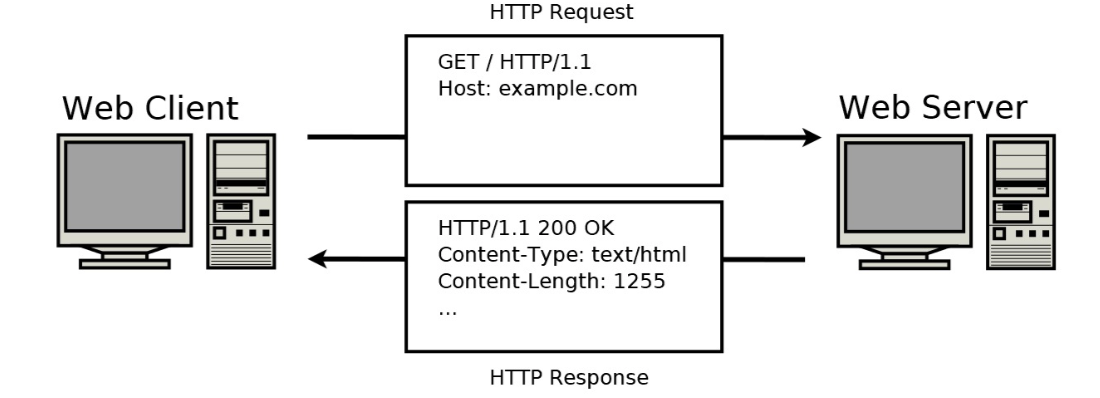


HTTP define un conjunto de métodos de petición para indicar la acción que se desea realizar para un recurso determinado. Los métodos más comunes son GET y POST:

- `GET`: el método GET  solicita una representación de un recurso específico. Las peticiones que usan el método GET sólo deben recuperar datos.
- `POST`: el método POST se utiliza para enviar una entidad a un recurso en específico, causando a menudo un cambio en el estado o efectos secundarios en el servidor.

En este ejercicio, exploraremos distintas formas de extraer datos desde la WWW, utilizando la librería `requests` para enviar peticiones HTTP a un servidor (Ej. GET, POST), y recoger la respuesta en un objeto tipo `Response`, que implementa métodos y atributos para leer y explorar los datos extraídos. 

La documentación detallada de esto se encuentra en el siguiente link:

https://docs.python-requests.org/en/latest/api/#requests.Response

Siempre que se hace un llamado a `requests.get()`, están ocurriendo dos cosas importantes. Primero, se está construyendo un objeto tipo `Request`, el cual será enviado a un servidor con el fin de obtener información de éste. Segundo, un objeto `Response` es generado una vez que requests obtenga una respuesta del servidor. El objeto respuesta contiene toda la información entregada por el servidor, así como el objecto `Request` que fue creado originalmente.


### 2.1 URL

Frecuentemente, los datos que necesitamos para aplicar nuestros conocimientos de ciencia de datos están publicados en alguna dirección web or URL (Universal Resource Locator). Podemos descargarlos fácilmente navegando hacia dicha URL y haciendo click en un link, pero esto supone limitaciones de reproducibilidad y escalabilidad (por ejemplo, si queremos descargar muchos archivos).
 
Para automatizar el proceso, podemos utilizar códigos de Python para importar y guardar localmente datasets de la WWW, y convertirlos en DataFrames de Pandas, usando las librerías `urllib`o `requests`. También es posible usar Pandas directamente para leer un archivo mediante su URL.


In [2]:
import urllib.request

if not os.path.exists('./estimaciones-y-proyecciones-chile-1992-2050-base-2017-poblacion-e-indicadores.xlsx'):

      url = 'http://www.censo2017.cl/descargas/proyecciones/estimaciones-y-proyecciones-chile-1992-2050-base-2017-poblacion-e-indicacores.xlsx'
      
      #defining header
      header= {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) ' 
            'AppleWebKit/537.11 (KHTML, like Gecko) '
            'Chrome/23.0.1271.64 Safari/537.11',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
            'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
            'Accept-Encoding': 'none',
            'Accept-Language': 'en-US,en;q=0.8',
            'Connection': 'keep-alive'}
      
      request=urllib.request.Request(url,None, header) #The assembled request
      response=urllib.request.urlopen(request)
      
      with open('estimaciones-y-proyecciones-chile-1992-2050-base-2017-poblacion-e-indicadores.xlsx','wb') as output:
        output.write(response.read())


El módulo `urllib.request` define funciones y clases que ayudan en la apertura de URLs (la mayoría HTTP) en un mundo complejo — autenticación básica y digest, redirecciones, cookies y más.

Se recomienda el paquete `Requests` para una interfaz de cliente HTTP de mayor nivel. Utilizaremos esta opción para descargar los datos del Censo 2017, incluyendo las estimaciones de población 1991-2020, los datos a nivel de manzana censal, y la cartografía por región.

In [3]:
#lo mismo que hicimos antes, pero ahora más resumido usando Requests
import requests, zipfile, io

if not os.path.exists('./estimaciones-y-proyecciones-chile-1992-2050.xlsx'):
    response = requests.get(url)
    
    with open("estimaciones-y-proyecciones-chile-1992-2050.xlsx", "wb") as file:
        file.write(response.content)
    

Luego descargamos los microdatos censales. Este dataset corresponde a un archivo binario comprimido (.zip), por lo tanto lo abrimos como un objeto tipo byte usando la librería `io`.

Finalmente, descomprimimos usando `zipfile`: https://docs.python.org/es/3.10/library/zipfile.html#zipfile-objects

In [4]:
if not os.path.exists('./Censo2017_16R_ManzanaEntidad_CSV/Censo2017_Manzanas.csv'):

    #luego descargamos los microdatos censales. 
    url ='http://www.censo2017.cl/descargas/microdatos/Censo2017_ManzanaEntidad_CSV.zip'

    r = requests.get(url, stream=True)


    #Este dataset corresponde a un archivo binario comprimido, por lo tanto lo abrimos como un objeto tipo byte usando la librería io
    #Luego descomprimimos usando zipfile: https://docs.python.org/es/3.10/library/zipfile.html#zipfile-objects

    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()
    #Así, el resultado es una carpeta descomprimida en la que está la información descargada: Censo2017_16R_ManzanaEntidad_CSV/


In [5]:
dat_manz=pd.read_csv('Censo2017_16R_ManzanaEntidad_CSV/Censo2017_Manzanas.csv',delimiter=';')
print(dat_manz.head())
#dat_manz

   REGION  PROVINCIA  COMUNA  DC  AREA  ZC_LOC  MZ_ENT  ID_ZONA_LOC   
0       1         11    1101   1     1       1       1         7849  \
1       1         11    1101   1     1       1      10         7849   
2       1         11    1101   1     1       1      11         7849   
3       1         11    1101   1     1       1      12         7849   
4       1         11    1101   1     1       1      13         7849   

      ID_MANZENT  PERSONAS  ... MATREC MATIRREC P05_1 P05_2 P05_3 P05_4   
0  1101011001001        15  ...      0        0     0     0     0     0  \
1  1101011001010        70  ...      1        0    15     0     0     0   
2  1101011001011        36  ...      5        0    15     0     0     0   
3  1101011001012        65  ...      9        4    24     0     0     0   
4  1101011001013        39  ...      0        0     9     0     0     0   

  REGION_15R PROVINCIA_15R  COMUNA_15R  ID_MANZENT_15R  
0          1            11        1101   1101011001001  
1       

La cartografía censal también está disponible en la página http://www.censo2017.cl/servicio-de-mapas/, pero está publicada en la forma de un archivo .rar por región. Por lo tanto, en este caso la descarga automatizada es conveniente para iterar sobre todas las regiones:

In [6]:
#https://www.ine.cl/docs/default-source/descarga-cartograf%C3%ADa-censo-2017/r13.rar
#descarga de cartografia

#for reg in np.arange(1,17):
if not os.path.exists('./R13'):

    for reg in np.arange(13,14):
        if reg<10:
            regs='r0%d.rar'%reg
        else:
            regs='r%d.rar'%reg

        url='https://www.ine.cl/docs/default-source/descarga-cartograf%C3%ADa-censo-2017/'+regs
        print(url,regs)

        response = requests.get(url)

        with open(regs, "wb") as file:
            file.write(response.content)

### 2.2 Webscrapping

El proceso de webscrapping en su expresión más básica consiste en la extracción de datos desde el texto plano que estructura la página web (HTML). `Requests` nos brinda herramientas para la extracción de la página, y a continuación podemos usar otras librerías como `BeautifulSoup` para la extracción de elementos o información contenida en el texto plano.

En la clase pasada vimos algunos ejemplos de webscrapping para obtener el texto de artículos de un diario online, y para la extracción de datos de la base de datos inmobiliaria (www.toctoc.com) utilizando solicitudes de tipo GET y de tipo POST.

En el ejercicio desarrollado a continuación utilizaremos los datos extraidos de Toctoc.


### 2.3 API

Una API es un conjunto de protocolos y rutinas que define cómo una aplicación (o programa) se comunica con otros programas, y vice-versa.

Una forma standard de transferir data a través de una API es mediante el formato JSON, acrónimo de JavaScript Object Notation. Es un formato interpretable por humanos, y puede ser manejado mediante la librería `json` de python.

Para obtener data de una API, debemos enviar una solicitud o "request". El método `requests.get()` recibe el string de una URL desde donde obtener datos, y argumentos opcionales (keywords) útiles para trabajar con APIs:
- `url`: dirección del recurso, más un string de query o consulta escrito de acuerdo a la documentación de cada API.
- `params`: permite entregar un diccionario con nombres y valores de parámetros para personalizar peticiones a la API.
- `headers`: también corresponde a un diccionario de cabeceras HTTP pasadas a la API, por ejemplo para autenticación del usuario.

El resultado es un objeto `response`, que contiene los datos y la metadata. El método `response.json()` permite acceder solamente a los datos.


#### API Yelp

Por ejemplo, la aplicación Yelp permite a los usuarios calificar y enviar comentarios sobre distintos negocios, y disponibiliza esta información mediante un conjunto de APIs.

https://www.yelp.com/developers/documentation/v3/get_started

https://www.yelp.com/developers/documentation/v3/authentication


In [7]:
import requests

api_url='https://api.yelp.com/v3/businesses/search'

params={'term':'restaurants','location':'RM Santiago, Chile','limit':50}

clientid='GWOCZh9-BmZxtdsAjr7Gug'

apikey='FHVvXoNmTXIl9DuxYis7AV5uLPujm9MLwrhgs5NgvCfaOxd3V6mxt6dQU8eEqYJiGxe816XATx7ufWjbMWqbV-2Uku1jxBJv8BGRC74NroLPl27PDQqs0tDixit-YHYx'
headers={'Authorization':'Bearer %s'%apikey}

Este código configura las variables necesarias para realizar una solicitud a la API de Yelp, incluyendo la URL de la API, los parámetros de la solicitud, las credenciales de autenticación y el encabezado de autenticación.

Específicamente los comandos utilizados y su explicación son:

    import requests: importamos el módulo requests, que nos permite realizar solicitudes HTTP desde Python.

    api_url = 'https://api.yelp.com/v3/businesses/search': creamos una variable api_url que contiene la URL de la API de Yelp que deseamos utilizar.

    params = {'term': 'restaurants', 'location': 'RM Santiago, Chile', 'limit': 50}: creamos un diccionario que contiene los parámetros que vamos a enviar a la API de Yelp. En este caso, estamos buscando restaurantes en la Región Metropolitana, y queremos recibir como máximo 50 resultados.

    clientid = 'GWOCZh9-BmZxtdsAjr7Gug': creamos una variable clientid que contiene el ID de cliente de Yelp que se utilizará para realizar la solicitud.

    apikey = 'FHVvXoNmTXIl9DuxYis7AV5uLPujm9MLwrhgs5NgvCfaOxd3V6mxt6dQU8eEqYJiGxe816XATx7ufWjbMWqbV-2Uku1jxBJv8BGRC74NroLPl27PDQqs0tDixit-YHYx': creamos una variable apikey que contiene la clave de API de Yelp que se utilizará para realizar la solicitud.

    headers = {'Authorization': 'Bearer %s' % apikey}: creamos un diccionario headers que contiene el encabezado de autenticación que se utilizará en la solicitud. En este caso, estamos utilizando el método de autenticación de OAuth 2.0 con el token de acceso de Yelp.

In [8]:
import json

if not os.path.exists('./restaurants.json'):
    params={'term':'restaurants','location':'RM Santiago, Chile','limit':50}
    response=requests.get(api_url,params=params,headers=headers)
    data=response.json()

    print(data.keys())
    print(data['total'])
    
    with open("restaurants.json", "w") as outfile:
        outfile.write(json.dumps(data))

Este código toma los datos de la respuesta HTTP recibida a través de la API de Yelp y los guarda en un archivo "restaurants.json" en formato JSON.

Para esto, se crea un archivo llamado "restaurants.json" en modo de escritura ("w") y lo asigna a la variable outfile. Luego, la función json.dumps() toma el diccionario data y lo convierte en una cadena JSON. Finalmente, la cadena JSON se escribe en el archivo "restaurants.json" usando el método write() sobre la variable outfile.

Una característica del formato JSON es que puede ser anidado: el valor de un atributo es un nuevo diccionario, o conjunto de pares atributo-valor. Este tipo de datos anidados es más conveniente de utilzar en formato "aplanado" o "flattened", de manera que pueda set almacenado en un data frame. El submódulo `pandas.io.json` tiene una función `json_normalize()` que hace exactamente esto:

https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html

La data entregada por la API Yelp API es anidada. 

In [9]:

with open("restaurants.json", "r") as outfile:
    data = json.load(outfile)

data['businesses'][0].keys()

dict_keys(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count', 'categories', 'rating', 'coordinates', 'transactions', 'price', 'location', 'phone', 'display_phone', 'distance'])

In [10]:
data['businesses'][0]['location']

{'address1': 'Bellavista 052',
 'address2': '',
 'address3': '',
 'city': 'Santiago',
 'zip_code': '8320000',
 'country': 'CL',
 'state': 'RM',
 'display_address': ['Bellavista 052', 'RM 8320000 Santiago', 'Chile']}

In [11]:
from pandas import json_normalize

rests = json_normalize(data["businesses"],sep="_")
print(rests.info())
print(rests.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        50 non-null     object 
 1   alias                     50 non-null     object 
 2   name                      50 non-null     object 
 3   image_url                 50 non-null     object 
 4   is_closed                 50 non-null     bool   
 5   url                       50 non-null     object 
 6   review_count              50 non-null     int64  
 7   categories                50 non-null     object 
 8   rating                    50 non-null     float64
 9   transactions              50 non-null     object 
 10  price                     39 non-null     object 
 11  phone                     50 non-null     object 
 12  display_phone             50 non-null     object 
 13  distance                  50 non-null     float64
 14  coordinates_

La función json_normalize(), del paquete pandas, nos permite convertir los datos JSON de la respuesta de la API de Yelp en un DataFrame de pandas. En este caso, la función toma la lista de negocios (businesses) de la respuesta JSON de la API de Yelp y los normaliza en una tabla de pandas.

La variable rests es el DataFrame resultante. La función info() se utiliza para imprimir información básica sobre el DataFrame, como el número de filas y columnas, el nombre de cada columna y el tipo de datos en cada columna.

El resultado es una tabla de pandas con información sobre los restaurantes, que incluye el nombre, la dirección, las coordenadas geográficas, la categoría y otros detalles de cada restaurante.

In [12]:
if not os.path.exists('./restaurants_stgo_yelp.csv'):

    offset=0
    allrests=[]
    while offset<=950:
        print(offset)
        params={'term':'restaurants','location':'RM Santiago, Chile','limit':50,'offset':offset}
    
        response=requests.get(api_url,params=params,headers=headers)
        data=response.json()
        rests = json_normalize(data["businesses"],sep="_")
        allrests.append(rests)
        offset=offset+50
    
    rests=pd.concat(allrests,ignore_index=True)
    print(rests.head())
    print(rests.info())

    rests.to_csv('restaurants_stgo_yelp.csv')
    rests.head()
        

Este código realiza una solicitud a la API de Yelp para obtener información sobre restaurantes, pero, a diferencia del caso anterior, en este caso se recopila información de todos los restaurantes disponibles, no solo los primeros 50. Esto se hace utilizando el parámetro "offset" en la solicitud de API, que permite desplazarse por los resultados de la búsqueda. La variable "allrests" se inicializa como una lista vacía y se usa para almacenar los datos de todos los restaurantes obtenidos.

La solicitud de API se realiza dentro de un ciclo while que se ejecutará hasta que se hayan obtenido todos los resultados. En cada iteración, se actualiza el valor del parámetro "offset" para obtener los siguientes 50 resultados. Los datos de cada iteración se normalizan usando la función json_normalize y se agregan a la lista "allrests". Finalmente, cuando se han obtenido todos los resultados, la lista completa de datos se puede combinar en un solo DataFrame.

#### API Google Places

Otra API útil para encontrar lugares en base a su ubicación y categoría es la Google Places:

https://developers.google.com/maps/documentation/places/web-service/search

Esta API requiere la creación de una cuenta y key con cargo a una tarjeta de crédito.

## 3. Limpieza y Transformación de Datos.

In [13]:
import geopandas as gpd
dat=pd.read_csv('restaurants_stgo_yelp.csv')
gdf = gpd.GeoDataFrame(dat, geometry=gpd.points_from_xy(dat['coordinates_longitude'], dat['coordinates_latitude']), crs='epsg:4326')

In [14]:
gdf.head(30)

,Unnamed: 0,id,alias,name,image_url,is_closed,url,review_count,categories,rating,...,coordinates_longitude,location_address1,location_address2,location_address3,location_city,location_zip_code,location_country,location_state,location_display_address,geometry
0,0,8N6Y3HsLXHBeFwhlO0YxwQ,barrica-94-santiago,Barrica 94,https://s3-media4.fl.yelpcdn.com/bphoto/IsbzIa...,False,https://www.yelp.com/biz/barrica-94-santiago?a...,76,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",4.5,...,-70.635224,Bellavista 052,NaN,NaN,Santiago,8320000.0,CL,RM,"['Bellavista 052', 'RM 8320000 Santiago', 'Chi...",POINT (-70.63522 -33.43429)
1,1,y2FR-JBGie4wiW6RjtKLhg,aquí-está-coco-santiago,Aquí Está Coco,https://s3-media4.fl.yelpcdn.com/bphoto/W9lFJp...,False,https://www.yelp.com/biz/aqu%C3%AD-est%C3%A1-c...,57,"[{'alias': 'seafood', 'title': 'Seafood'}]",4.5,...,-70.616624,La Concepción 236,NaN,NaN,Santiago,NaN,CL,RM,"['La Concepción 236', 'RM Santiago', 'Chile']",POINT (-70.61662 -33.42406)
2,2,LGwEqYL0reUsRdtqE44ITQ,chipe-libre-república-independiente-del-pisco-...,Chipe Libre - República Independiente del Pisco,https://s3-media2.fl.yelpcdn.com/bphoto/gi4T3u...,False,https://www.yelp.com/biz/chipe-libre-rep%C3%BA...,73,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.5,...,-70.641144,José Victorino Lastarria 282,NaN,NaN,Santiago,8320156.0,CL,RM,"['José Victorino Lastarria 282', 'RM 8320156 S...",POINT (-70.64114 -33.43834)
3,3,U15KdCy6HH05WISNtN9plQ,restaurant-peumayén-santiago,Restaurant Peumayén,https://s3-media2.fl.yelpcdn.com/bphoto/wkJAtF...,False,https://www.yelp.com/biz/restaurant-peumay%C3%...,68,"[{'alias': 'latin', 'title': 'Latin American'}]",4.5,...,-70.634821,Constitución 136,NaN,NaN,Santiago,7500000.0,CL,RM,"['Constitución 136', 'RM 7500000 Santiago', 'C...",POINT (-70.63482 -33.43281)
4,4,IUBOvOYsrcyRMdp8V2O06g,la-diana-santiago,La Diana,https://s3-media3.fl.yelpcdn.com/bphoto/RDs9-j...,False,https://www.yelp.com/biz/la-diana-santiago?adj...,13,"[{'alias': 'brasseries', 'title': 'Brasseries'...",4.5,...,-70.649611,Arturo Prat 435,NaN,NaN,Santiago,8320000.0,CL,RM,"['Arturo Prat 435', 'RM 8320000 Santiago', 'Ch...",POINT (-70.64961 -33.45090)
5,5,D7aZ9ZGpnyObEawvMsXi_A,liguria-santiago-5,Liguria,https://s3-media1.fl.yelpcdn.com/bphoto/5ANiJh...,False,https://www.yelp.com/biz/liguria-santiago-5?ad...,30,"[{'alias': 'chilean', 'title': 'Chilean'}]",4.0,...,-70.602806,Luis Thayer Ojeda 019,NaN,NaN,Santiago,7500000.0,CL,RM,"['Luis Thayer Ojeda 019', 'RM 7500000 Santiago...",POINT (-70.60281 -33.41830)
6,6,sK0uAwUhsFII6MkuyiMCFA,la-cabrera-santiago,La Cabrera,https://s3-media1.fl.yelpcdn.com/bphoto/cwJ0m5...,False,https://www.yelp.com/biz/la-cabrera-santiago?a...,7,"[{'alias': 'steak', 'title': 'Steakhouses'}]",4.5,...,-70.588570,Alonso de Córdova 4263,NaN,NaN,Santiago,NaN,CL,RM,"['Alonso de Córdova 4263', 'RM Santiago', 'Chi...",POINT (-70.58857 -33.40349)
7,7,KQ2D3gs9y0wIuTqoKOHO4w,mestizo-santiago,Mestizo,https://s3-media3.fl.yelpcdn.com/bphoto/GV-sn6...,False,https://www.yelp.com/biz/mestizo-santiago?adju...,55,"[{'alias': 'chilean', 'title': 'Chilean'}, {'a...",4.5,...,-70.600033,Av. del Bicentenario 4050,NaN,NaN,Santiago,8320000.0,CL,RM,"['Av. del Bicentenario 4050', 'RM 8320000 Sant...",POINT (-70.60003 -33.39408)
8,8,CAFL80wAGOMcPrEO6uMnkA,fuente-alemana-santiago-2,Fuente Alemana,https://s3-media3.fl.yelpcdn.com/bphoto/k8j_Ud...,False,https://www.yelp.com/biz/fuente-alemana-santia...,58,"[{'alias': 'sandwiches', 'title': 'Sandwiches'}]",4.5,...,-70.636024,Av. Libertador Bernardo O'Higgins 58,NaN,NaN,Santiago,8320000.0,CL,RM,"[""Av. Libertador Bernardo O'Higgins 58"", 'RM 8...",POINT (-70.63602 -33.43752)
9,9,x4R6h8NqBQmEp-tAnyFO3g,castillo-forestal-santiago,Castillo Forestal,https://s3-media4.fl.yelpcdn.com/bphoto/ToIFZd...,False,https://www.yelp.com/biz/castillo-forestal-san...,19,"[{'alias': 'french', 'title': 'French'}, {'ali...",4.5,...,-70.642646,Av. Cardenal José María Caro 390,NaN,NaN,Santiago,8320000.0,CL,RM,"['Av. Ca

Acá creamos un GeoDataFrame utilizando la biblioteca Geopandas. Un GeoDataFrame es un DataFrame de Pandas que contiene una columna que representa datos geográficos, permitiéndonos trabajar con datos geográficos y espaciales.

En este caso, leemos el archivo 'restaurants_stgo_yelp.csv' utilizando la función `read_csv` de Pandas, que devuelve un objeto DataFrame. Luego, se utiliza la función `points_from_xy` de Geopandas para crear un objeto de puntos a partir de las coordenadas de longitud y latitud del DataFrame, y se asigna la columna geometry del GeoDataFrame. Por último, se especifica un sistema de coordenadas de referencia (CRS) utilizando `crs='epsg:4326'`, que es el CRS comúnmente utilizado para coordenadas geográficas en WGS84.

NOTA: WGS84 (World Geodetic System 1984) es un sistema de referencia geodésico utilizado para la medición de la forma, la orientación y la escala de la Tierra. Es utilizado como base para la definición de sistemas de coordenadas geográficas y es utilizado en aplicaciones como navegación, cartografía, y sistemas de información geográfica (SIG). WGS84 se basa en una red global de estaciones de medición terrestres, satélites y técnicas de procesamiento de datos para proporcionar una precisión de posicionamiento de aproximadamente 2-3 metros en la mayoría de las áreas del mundo.

In [15]:
zonas=gpd.read_file('R13/ZONA_C17.shp')
print(zonas.crs)
zonas=zonas.to_crs(4326)
print(zonas.crs)

comunas=gpd.read_file('R13/COMUNA_C17.shp')
comunas=comunas.to_crs(4326)

#Pasamos de un sistema de coordenadas al que nos interesa: WGS84 <--- EPSG:4326

EPSG:4674
EPSG:4326


(-33.7, -33.3)

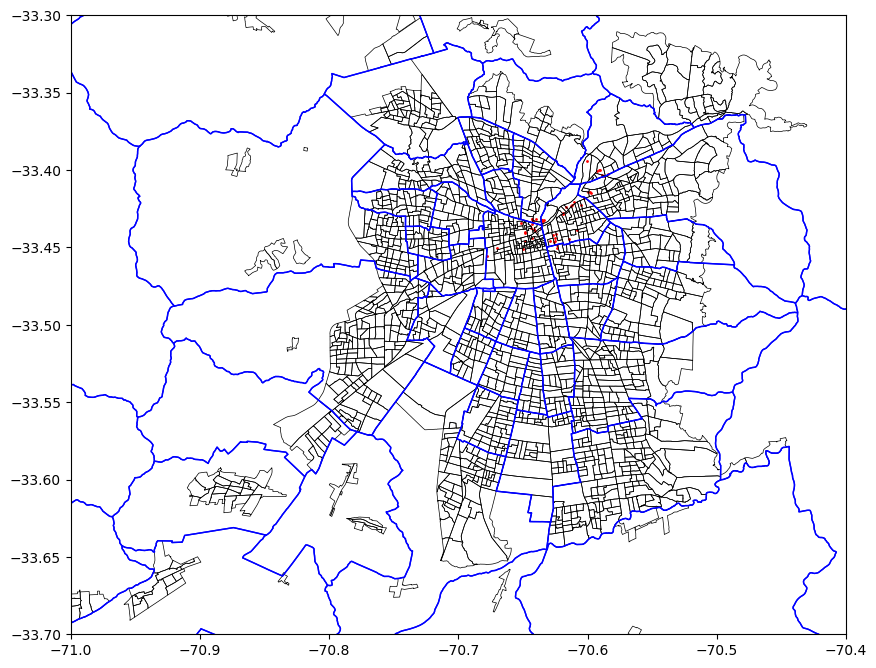

In [16]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

zonas.boundary.plot(ax=ax,lw=0.5,color='k') #limitando la zona de interés
comunas.boundary.plot(ax=ax,lw=1,color='b') #limitando las comunas dentro de la zona

gdf.plot(ax=ax,markersize=1,color='r')
ax.set_xlim(-71.0,-70.4)
ax.set_ylim(-33.7,-33.3)

Para acotar el problema, seleccionaremos sólo las comunas de Santiago, Providencia, Las Condes, Ñuñoa y Vitacura:

In [17]:
comunas['NOM_COMUNA'].unique()

array(['PAINE', 'BUIN', 'PUDAHUEL', 'CERRO NAVIA', 'COLINA', 'TILTIL',
       'LAMPA', 'HUECHURABA', 'CONCHALÍ', 'MARÍA PINTO', 'CURACAVÍ',
       'LA PINTANA', 'EL BOSQUE', 'ESTACIÓN CENTRAL',
       'PEDRO AGUIRRE CERDA', 'RECOLETA', 'INDEPENDENCIA',
       'ISLA DE MAIPO', 'LO ESPEJO', 'LA CISTERNA', 'LA FLORIDA',
       'PEÑALOLÉN', 'LAS CONDES', 'LA REINA', 'LO BARNECHEA', 'VITACURA',
       'QUINTA NORMAL', 'LO PRADO', 'CERRILLOS', 'MAIPÚ', 'MELIPILLA',
       'MACUL', 'ÑUÑOA', 'PEÑAFLOR', 'PADRE HURTADO', 'PUENTE ALTO',
       'QUILICURA', 'RENCA', 'CALERA DE TANGO', 'SAN BERNARDO',
       'SAN JOSÉ DE MAIPO', 'PIRQUE', 'SAN JOAQUÍN', 'SAN MIGUEL',
       'SAN RAMÓN', 'LA GRANJA', 'PROVIDENCIA', 'SANTIAGO', 'EL MONTE',
       'TALAGANTE', 'SAN PEDRO', 'ALHUÉ'], dtype=object)

In [18]:
comunas_seleccionadas = ['PROVIDENCIA','SANTIAGO','LAS CONDES','ÑUÑOA']

comunas=comunas[comunas['NOM_COMUNA'].isin(comunas_seleccionadas)]
zonas=zonas[zonas['NOM_COMUNA'].isin(comunas_seleccionadas)]

<Axes: >

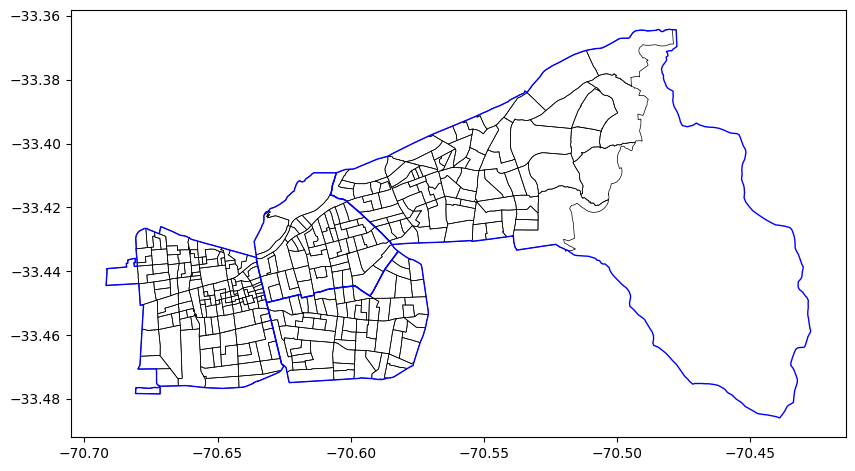

In [19]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

zonas.boundary.plot(ax=ax,lw=0.5,color='k')
comunas.boundary.plot(ax=ax,lw=1,color='b')

#### Combinación de Datos de Propiedades, Restaurantes y Censo.

## 4. Trabajo Individual

A partir de este punto, ud. seguirá desarrollando los pasos necesarios para completar el objetivo planteado en el punto 2. Es decir, construir un geoDataframe limpio con las siguientes columnas:

- Zona
- Población total
- Densidad de población (habitantes/m2)
- Nº de restaurants
- Nota promedio de restaurants
- Precio típico de restaurants
- Precio promedio de casas (UF/m2)
- Precio promedio de departamentos (UF/m2)

Esto incluye:

1. Identificar valores faltantes o extremos en el dataset de propiedades.
2. Plantear e implementar un método para reemplazar valores faltantes o extremos en el dataset de propiedades.
3. Verificar si existen datos faltantes o nulos en la base de datos censales (población).
4. Unir los datos de población y zonas censales, mediante el identificador único de zona.
5. Calcular las columnas faltates: densidad de población, notas y precios promedios por zona.

In [20]:
from sklearn.preprocessing import MinMaxScaler

def null_values(df: pd.DataFrame, name):
    columns = df.columns

    nan = df.isna().sum()
    zeros = (df.isin([0, '', {}, []])).sum()

    print(f"El dataset {name} con {len(df)} tuplas presenta:")
    for col in columns:
        if nan[col] != 0 or zeros[col] != 0 or len(df[col].unique()) < 2:
            print(f"En la columna {col}({df[col].dtype}), {nan[col]} nan, {zeros[col]} nulo y {len(df[col].unique())} valores unicos")
        else:
            print(f'✅ {col}({df[col].dtype})')

def extremal_points(df, box_columns):
    scaler = MinMaxScaler((0, 100))
    if len(box_columns) > 1:
        df_mm = pd.DataFrame(scaler.fit_transform(df[box_columns]), columns=box_columns)
        print(df[box_columns].describe())
    else:
        df_mm = df

    # Creación de la figura y los ejes
    fig, ax = plt.subplots(figsize=(2*len(box_columns),5))
    
    # Creación del gráfico de cajas
    box_data = [df_mm[c] for c in box_columns]
    
    ax.boxplot(box_data, labels=box_columns, vert=True, patch_artist=True)
    # Mostrar el gráfico
    plt.show()

#### 1. Identificar valores faltantes o extremos en el dataset de propiedades.


In [21]:
gdf.columns

Index(['Unnamed: 0', 'id', 'alias', 'name', 'image_url', 'is_closed', 'url',
       'review_count', 'categories', 'rating', 'transactions', 'price',
       'phone', 'display_phone', 'distance', 'coordinates_latitude',
       'coordinates_longitude', 'location_address1', 'location_address2',
       'location_address3', 'location_city', 'location_zip_code',
       'location_country', 'location_state', 'location_display_address',
       'geometry'],
      dtype='object')

In [22]:
null_values(gdf, 'restaurants')

El dataset restaurants con 50 tuplas presenta:
En la columna Unnamed: 0(int64), 0 nan, 1 nulo y 50 valores unicos
✅ id(object)
✅ alias(object)
✅ name(object)
✅ image_url(object)
En la columna is_closed(bool), 0 nan, 50 nulo y 1 valores unicos
✅ url(object)
✅ review_count(int64)
✅ categories(object)
✅ rating(float64)
En la columna transactions(object), 0 nan, 0 nulo y 1 valores unicos
En la columna price(object), 11 nan, 0 nulo y 5 valores unicos
En la columna phone(float64), 3 nan, 0 nulo y 48 valores unicos
En la columna display_phone(object), 3 nan, 0 nulo y 48 valores unicos
✅ distance(float64)
✅ coordinates_latitude(float64)
✅ coordinates_longitude(float64)
✅ location_address1(object)
En la columna location_address2(object), 48 nan, 0 nulo y 3 valores unicos
En la columna location_address3(float64), 50 nan, 0 nulo y 1 valores unicos
✅ location_city(object)
En la columna location_zip_code(float64), 20 nan, 0 nulo y 15 valores unicos
En la columna location_country(object), 0 nan, 0 n

La única con valores nulos preocupante es price, pues is_closed, transactions, location_country, location_address3 y location_state tiene el mismo valor en toda la columna, por lo que son columnas despreciables. Luego el resto de las columnas que presenta valores nulos no son importantes para el objetivo planteado. 

In [23]:
print(gdf['price'].unique())
print(gdf['rating'].unique())
print(gdf['categories'].unique())

['$$' '$$$$' '$$$' nan '$']
[4.5 4.  5.  3.5]
["[{'alias': 'wine_bars', 'title': 'Wine Bars'}, {'alias': 'chilean', 'title': 'Chilean'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}]"
 "[{'alias': 'seafood', 'title': 'Seafood'}]"
 "[{'alias': 'bars', 'title': 'Bars'}, {'alias': 'peruvian', 'title': 'Peruvian'}, {'alias': 'chilean', 'title': 'Chilean'}]"
 "[{'alias': 'latin', 'title': 'Latin American'}]"
 "[{'alias': 'brasseries', 'title': 'Brasseries'}, {'alias': 'pubs', 'title': 'Pubs'}, {'alias': 'latin', 'title': 'Latin American'}]"
 "[{'alias': 'chilean', 'title': 'Chilean'}]"
 "[{'alias': 'steak', 'title': 'Steakhouses'}]"
 "[{'alias': 'chilean', 'title': 'Chilean'}, {'alias': 'international', 'title': 'International'}]"
 "[{'alias': 'sandwiches', 'title': 'Sandwiches'}]"
 "[{'alias': 'french', 'title': 'French'}, {'alias': 'chilean', 'title': 'Chilean'}]"
 "[{'alias': 'peruvian', 'title': 'Peruvian'}]"
 "[{'alias': 'sportsbars', 'title': 'Sports Bars'}, {'alias': 'mexican'

In [24]:
import ast

wdf = gdf[['geometry', 'rating', 'review_count', 'name', 'categories', 'distance']]
wdf['price'] = gdf['price'].apply(lambda x: len(x) if type(x) == str else 0)


wdf.describe()

,rating,review_count,distance,price
count,50.000000,50.000000,50.000000,50.000000
mean,4.440000,22.300000,2491.398385,1.980000
std,0.359137,23.274099,1708.940504,1.253404
min,3.500000,1.000000,20.226421,0.000000
25%,4.000000,7.000000,1509.451668,2.000000
50%,4.500000,13.000000,2048.821252,2.000000
75%,4.500000,25.750000,3430.631898,3.000000
max,5.000000,97.000000,6034.856265,4.000000


          rating  review_count     distance      price
count  50.000000     50.000000    50.000000  50.000000
mean    4.440000     22.300000  2491.398385   1.980000
std     0.359137     23.274099  1708.940504   1.253404
min     3.500000      1.000000    20.226421   0.000000
25%     4.000000      7.000000  1509.451668   2.000000
50%     4.500000     13.000000  2048.821252   2.000000
75%     4.500000     25.750000  3430.631898   3.000000
max     5.000000     97.000000  6034.856265   4.000000


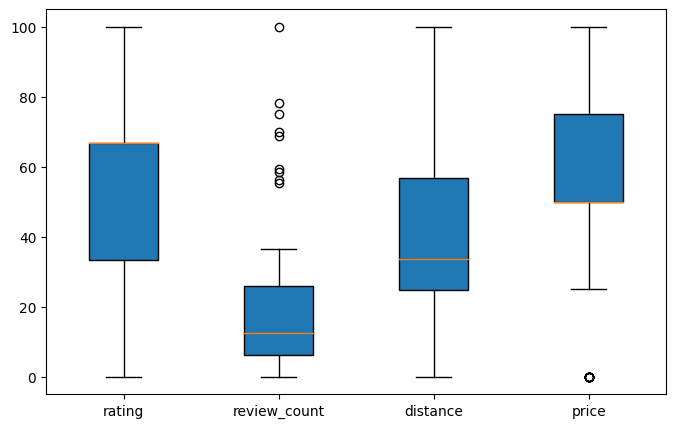

In [25]:
extremal_points(wdf, ['rating', 'review_count','distance', 'price'])


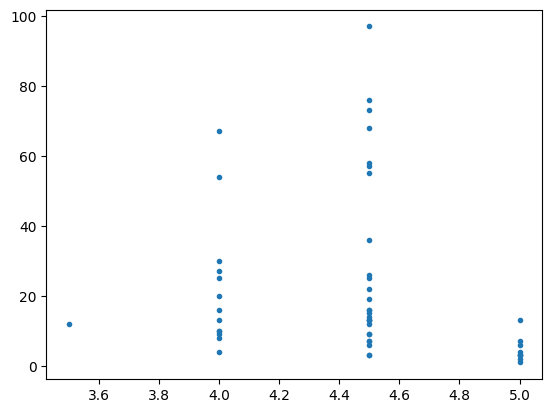

In [26]:
plt.plot(wdf['rating'], wdf['review_count'], '.')
plt.show()

En el boxplot se aprecia que la columna review_count tiene algunos valores extraños, pero la relación entre el rating de los restaurantes y la cantidad de review parece razonable. Los lugares más visitados en general tiene ratings altos, los lugares más  visitados tiene mayor cantidad de reviews y a mayor cantidad de reviews mayor varianza en las opiniones. Por lo que puede ser razonable que un buen restaurante tenga una gran cantidad de reviews y su rating sea alto pero no el máximo posible.  

#### 2. Plantear e implementar un método para reemplazar valores faltantes o extremos en el dataset de propiedades.


Para completar los datos faltantes en la columna de precios se puede utilizar un algoritmo predictivo supervisa sencillo para inferior un valor para las tuplas deficientes 

In [27]:
d = dict([(x, i) for i, x in enumerate(['Santiago', 'Vitacura', 'Providencia', 'Las Condes'])])
wdf['location_city'] = gdf['location_city'].apply(lambda x: d[x])

categories_info = gdf['categories'].apply(lambda x: ast.literal_eval(x))
category_set = set()

for categories in categories_info:
    for category in categories:
        category_set.add((category['alias'], category['title']))


for category in category_set:
    wdf[f'{category[0]}_{category[1]}'] = categories_info.apply(
        lambda x: 1 if len(list(filter(lambda x: x['alias'] == category[0] and x['title'] == category[1], x))) > 0 else 0
    )

len(wdf.columns), wdf.columns

(43,
 Index(['geometry', 'rating', 'review_count', 'name', 'categories', 'distance',
        'price', 'location_city', 'peruvian_Peruvian',
        'cocktailbars_Cocktail Bars', 'pubs_Pubs', 'dimsum_Dim Sum',
        'sportsbars_Sports Bars', 'brasseries_Brasseries', 'sushi_Sushi Bars',
        'thai_Thai', 'chilean_Chilean', 'mediterranean_Mediterranean',
        'tapasmallplates_Tapas/Small Plates', 'trattorie_Trattorie',
        'french_French', 'cafes_Cafes', 'latin_Latin American',
        'restaurants_Restaurants', 'italian_Italian', 'nikkei_Nikkei',
        'tradamerican_American (Traditional)', 'wine_bars_Wine Bars',
        'mexican_Mexican', 'japanese_Japanese', 'bbq_Barbeque', 'korean_Korean',
        'tapas_Tapas Bars', 'international_International', 'spanish_Spanish',
        'steak_Steakhouses', 'seafood_Seafood', 'pizza_Pizza', 'indpak_Indian',
        'foodtrucks_Food Trucks', 'sandwiches_Sandwiches', 'bars_Bars',
        'signature_cuisine_Signature Cuisine'],
       d

In [28]:
train, test = wdf[(wdf['price'] > 0) & (wdf['review_count'] <= 40) ], wdf[wdf['price'] == 0]

features = [
    'rating', 'review_count', 
    'location_city', 'tradamerican_American (Traditional)',
    'brasseries_Brasseries', 'nikkei_Nikkei', 'cocktailbars_Cocktail Bars',
    'sportsbars_Sports Bars', 'international_International',
    'restaurants_Restaurants', 'pizza_Pizza', 'latin_Latin American',
    'trattorie_Trattorie', 'dimsum_Dim Sum', 'foodtrucks_Food Trucks',
    'spanish_Spanish', 'chilean_Chilean', 'french_French', 'cafes_Cafes',
    'signature_cuisine_Signature Cuisine', 'peruvian_Peruvian',
    'bbq_Barbeque', 'indpak_Indian', 'sandwiches_Sandwiches',
    'mediterranean_Mediterranean', 'sushi_Sushi Bars', 'steak_Steakhouses',
    'bars_Bars', 'korean_Korean', 'tapas_Tapas Bars', 'seafood_Seafood',
    'japanese_Japanese', 'tapasmallplates_Tapas/Small Plates',
    'mexican_Mexican', 'wine_bars_Wine Bars', 'italian_Italian',
    'pubs_Pubs', 'thai_Thai'
]
target = 'price'


In [29]:
from sklearn.neighbors import KNeighborsClassifier

tree = KNeighborsClassifier(n_neighbors=3)
_ = tree.fit(train[features], train[target])
tree.predict(test[features])

array([2, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2])

In [30]:
wdf.loc[wdf["price"] == 0, "price"] = tree.predict(test[features])

wdf['price'].describe()

count    50.000000
mean      2.520000
std       0.762381
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: price, dtype: float64

#### 3. Verificar si existen datos faltantes o nulos en la base de datos censales (población).

In [31]:
dat_manz.columns

Index(['REGION', 'PROVINCIA', 'COMUNA', 'DC', 'AREA', 'ZC_LOC', 'MZ_ENT',
       'ID_ZONA_LOC', 'ID_MANZENT', 'PERSONAS', 'HOMBRES', 'MUJERES',
       'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS', 'INMIGRANTES',
       'PUEBLO', 'VIV_PART', 'VIV_COL', 'VPOMP', 'TOTAL_VIV', 'CANT_HOG',
       'P01_1', 'P01_2', 'P01_3', 'P01_4', 'P01_5', 'P01_6', 'P01_7', 'P03A_1',
       'P03A_2', 'P03A_3', 'P03A_4', 'P03A_5', 'P03A_6', 'P03B_1', 'P03B_2',
       'P03B_3', 'P03B_4', 'P03B_5', 'P03B_6', 'P03B_7', 'P03C_1', 'P03C_2',
       'P03C_3', 'P03C_4', 'P03C_5', 'MATACEP', 'MATREC', 'MATIRREC', 'P05_1',
       'P05_2', 'P05_3', 'P05_4', 'REGION_15R', 'PROVINCIA_15R', 'COMUNA_15R',
       'ID_MANZENT_15R'],
      dtype='object')

In [32]:
null_values(dat_manz, 'manzanas')

El dataset manzanas con 180499 tuplas presenta:
✅ REGION(int64)
✅ PROVINCIA(int64)
✅ COMUNA(int64)
✅ DC(int64)
✅ AREA(int64)
✅ ZC_LOC(int64)
✅ MZ_ENT(int64)
✅ ID_ZONA_LOC(int64)
✅ ID_MANZENT(int64)
En la columna PERSONAS(int64), 0 nan, 5866 nulo y 1564 valores unicos
✅ HOMBRES(object)
✅ MUJERES(object)
✅ EDAD_0A5(object)
✅ EDAD_6A14(object)
✅ EDAD_15A64(object)
✅ EDAD_65YMAS(object)
✅ INMIGRANTES(object)
✅ PUEBLO(object)
En la columna VIV_PART(int64), 0 nan, 669 nulo y 848 valores unicos
En la columna VIV_COL(int64), 0 nan, 171353 nulo y 19 valores unicos
En la columna VPOMP(int64), 0 nan, 6658 nulo y 712 valores unicos
En la columna TOTAL_VIV(int64), 0 nan, 2 nulo y 843 valores unicos
En la columna CANT_HOG(int64), 0 nan, 6658 nulo y 725 valores unicos
En la columna P01_1(int64), 0 nan, 3165 nulo y 506 valores unicos
En la columna P01_2(int64), 0 nan, 166556 nulo y 737 valores unicos
En la columna P01_3(int64), 0 nan, 179197 nulo y 39 valores unicos
En la columna P01_4(int64), 0 nan, 

La gran mayoría de las columnas de dataset de manzanas tiene varios ceros en ellas, como no tenemos la documentación de dataset solo analizaremos las columnas con nombres expresivos relativos a la la población de cada zona. En este casos podemos ver que la columna `Personas` tiene 5866  ceros, mientras que las columnas `Mujeres`, `Hombres` y las que hacen referencia a las edades de las población no son numéricas, en caso de que estas columnas tuvieran una transformación directa y limpia a un valor entero entonces podríamos rellenar los valores faltantes en la columna `Persona`. Luego las columnas `VIV_COL` y `VIV_PART`, que parecen ser categorías de viviendas también presenta varios ceros, pero la columna `TOTAL_VIV` si tiene la información completa. Con la columna `TOTAL_VIV` se podría hacer una estimación de los valores faltantes en la columna `Persona`

In [33]:
# Las columnas que segmenta a la población también contiene valoras neutros(0) y extraños(*) 
for x in [ 'HOMBRES', 'MUJERES', 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'INMIGRANTES', 'PUEBLO']:
    print(x, dat_manz[dat_manz[x].isin(['*', '0'])][x].count())



HOMBRES 9241
MUJERES 9492
EDAD_0A5 93803
EDAD_6A14 72609
EDAD_15A64 10868
INMIGRANTES 144862
PUEBLO 70219


            PERSONAS      TOTAL_VIV       CANT_HOG
count  180499.000000  180499.000000  180499.000000
mean       97.363437      36.007706      31.311182
std       149.647870      61.678846      51.368963
min         0.000000       0.000000       0.000000
25%        35.000000      14.000000      12.000000
50%        63.000000      22.000000      20.000000
75%       105.000000      35.000000      32.000000
max      9197.000000    2575.000000    2296.000000


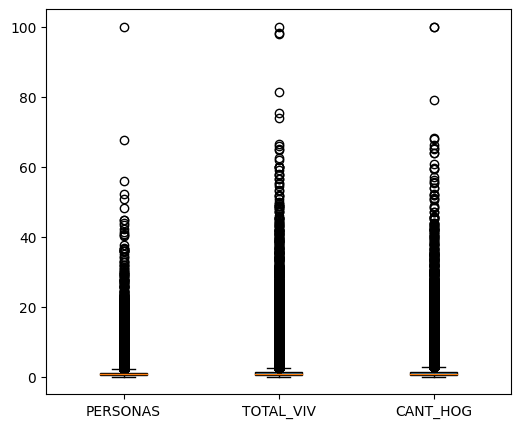

In [34]:
extremal_points(dat_manz, ['PERSONAS', 'TOTAL_VIV', 'CANT_HOG'])


Finalmente las tres columnas que mejor pudieran describir la densidad demográfica de cada zona presenta gran cantidad de valores extremos. 

In [35]:
casa = pd.read_csv('./casa1.csv')
null_values(casa, 'casa1')



El dataset casa1 con 19531 tuplas presenta:
En la columna Unnamed: 0(int64), 0 nan, 19531 nulo y 1 valores unicos
✅ codigo(int64)
✅ longitud(float64)
✅ latitud(float64)
✅ comuna(object)
✅ direccion(object)
En la columna m21(float64), 0 nan, 14641 nulo y 838 valores unicos
En la columna m22(float64), 0 nan, 14641 nulo y 832 valores unicos
En la columna bathroom(int64), 0 nan, 690 nulo y 31 valores unicos
En la columna dormitorios(int64), 0 nan, 690 nulo y 31 valores unicos
✅ precio11(float64)
✅ precio12(float64)
✅ precio21(float64)
En la columna precio22(float64), 0 nan, 13548 nulo y 613 valores unicos
✅ uf(float64)
✅ fecha_publicacion(object)
✅ url(object)
✅ url_img(object)
En la columna operacion(object), 0 nan, 0 nulo y 1 valores unicos


                 uf            m21            m22
count  1.953100e+04   19531.000000   19531.000000
mean   3.049889e+05      54.782719      55.106640
std    7.959205e+06     884.068431     884.099027
min    1.000000e+00       0.000000       0.000000
25%    4.990000e+03       0.000000       0.000000
50%    1.150000e+04       0.000000       0.000000
75%    2.154399e+04       0.725000       0.725000
max    4.500000e+08  111111.000000  111111.000000


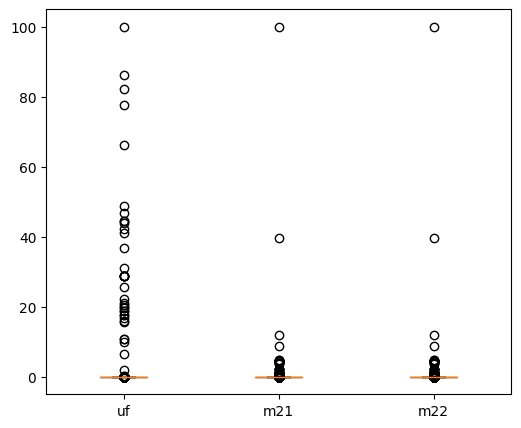

In [36]:
extremal_points(casa, ['uf', 'm21', 'm22'])

In [37]:
departamento = pd.read_csv('./departamento1.csv')
null_values(departamento, 'departamento')

El dataset departamento con 3325 tuplas presenta:
En la columna Unnamed: 0(int64), 0 nan, 3325 nulo y 1 valores unicos
✅ codigo(int64)
✅ longitud(float64)
✅ latitud(float64)
✅ comuna(object)
✅ direccion(object)
En la columna m21(float64), 0 nan, 723 nulo y 810 valores unicos
En la columna m22(float64), 0 nan, 723 nulo y 810 valores unicos
En la columna bathroom(int64), 0 nan, 471 nulo y 31 valores unicos
En la columna dormitorios(int64), 0 nan, 471 nulo y 31 valores unicos
✅ precio11(float64)
✅ precio12(float64)
✅ precio21(float64)
En la columna precio22(float64), 0 nan, 2856 nulo y 236 valores unicos
✅ uf(float64)
✅ fecha_publicacion(object)
✅ url(object)
✅ url_img(object)
En la columna operacion(object), 0 nan, 0 nulo y 1 valores unicos


                 uf            m21            m22
count  3.325000e+03    3325.000000    3325.000000
mean   3.578551e+05     380.583152     380.583152
std    1.071877e+07    3591.665547    3591.665547
min    2.300000e+00       0.000000       0.000000
25%    3.750000e+03      21.500000      21.500000
50%    7.400000e+03      68.000000      68.000000
75%    1.580000e+04     243.000000     243.000000
max    4.150000e+08  160000.000000  160000.000000


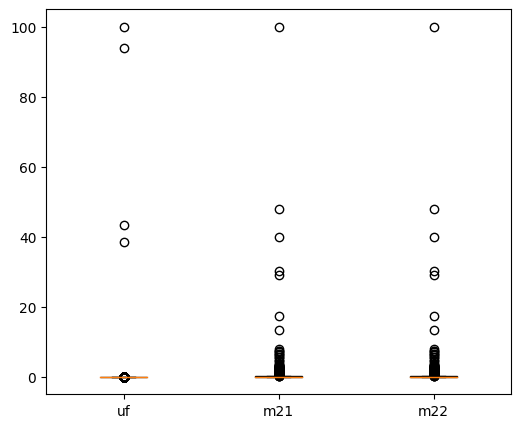

In [38]:
extremal_points(departamento, ['uf', 'm21', 'm22'])

En conclusion, en los datos de casas y departamentos hay muchos ceros en las columnas relativas a las dimensiones de estos y muchos valores extremos en dichas columnas y en la columna de precios UF. Especialmente esta columna que es la más interesante para el objetivo, se puede pensar que estos valores extremos al ser tan grades pueden deberse a errores de conversion entre UF y CLP  

#### 4. Unir los datos de población y zonas censales, mediante el identificador único de zona.

In [39]:
zonas

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,DISTRITO,LOC_ZON,GEOCODIGO,SHAPE_Leng,SHAPE_Area,geometry
335,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13123,PROVIDENCIA,PROVIDENCIA,6,4,13123061004,0.019084,0.000015,"POLYGON ((-70.63050 -33.44101, -70.63136 -33.4..."
381,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13120,ÑUÑOA,ÑUÑOA,2,5,13120021005,0.021213,0.000028,"POLYGON ((-70.57677 -33.43640, -70.57646 -33.4..."
403,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13114,LAS CONDES,LAS CONDES,5,1,13114051001,0.023027,0.000034,"POLYGON ((-70.56008 -33.41641, -70.56035 -33.4..."
755,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13114,LAS CONDES,LAS CONDES,4,1,13114041001,0.095757,0.000271,"POLYGON ((-70.47951 -33.36433, -70.47940 -33.3..."
756,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13114,LAS CONDES,LAS CONDES,4,3,13114041003,0.067824,0.000245,"POLYGON ((-70.52670 -33.38966, -70.52679 -33.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,SANTIAGO,11,1,13101111001,0.016085,0.000011,"POLYGON ((-70.63824 -33.44254, -70.63782 -33.4..."
1835,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,SANTIAGO,11,14,13101111014,0.011258,0.000006,"POLYGON ((-70.63944 -33.44325, -70.63923 -33.4..."
1836,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,SANTIAGO,11,6,13101111006,0.008697,0.000004,"POLYGON ((-70.64458 -33.44962, -70.64458 -33.4..."
1837,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13101,SANTIAGO,SANTIAGO,27,1,13101271001,0.025943,0.000029,"POLYGON ((-70.66477 -33.44733, -70.66480 -33.4..."


In [40]:
zonas = pd.merge(
    left=zonas,
    right=dat_manz.groupby('ID_ZONA_LOC').agg({'PERSONAS': 'sum'}),
    left_on='LOC_ZON',
    right_on='ID_ZONA_LOC',
    suffixes=[False, False],
    how='left'
)

zonas.describe()


,DISTRITO,LOC_ZON,SHAPE_Leng,SHAPE_Area,PERSONAS
count,323.000000,323.000000,323.000000,323.000000,323.000000
mean,8.699690,4.018576,0.022612,0.000030,1216.179567
std,6.386095,3.080639,0.013643,0.000041,1258.082801
min,1.000000,1.000000,0.004788,0.000001,20.000000
25%,3.000000,2.000000,0.015662,0.000012,48.000000
50%,8.000000,3.000000,0.019466,0.000018,1010.000000
75%,12.000000,5.000000,0.026133,0.000033,2062.000000
max,29.000000,19.000000,0.120179,0.000326,4741.000000


##### 5. Calcular las columnas faltates: densidad de población, notas y precios promedios por zona.

In [41]:
zonas['densidad_poblacional'] = zonas['PERSONAS']/ zonas['SHAPE_Area']

In [42]:
gdf.columns

Index(['Unnamed: 0', 'id', 'alias', 'name', 'image_url', 'is_closed', 'url',
       'review_count', 'categories', 'rating', 'transactions', 'price',
       'phone', 'display_phone', 'distance', 'coordinates_latitude',
       'coordinates_longitude', 'location_address1', 'location_address2',
       'location_address3', 'location_city', 'location_zip_code',
       'location_country', 'location_state', 'location_display_address',
       'geometry'],
      dtype='object')

In [43]:
def find_zone_by_ubi(df, zonas):
    loc_code = np.zeros(len(df))
    for i, point in enumerate(df['geometry']):
        for code, polygon in zip(zonas['LOC_ZON'], zonas['geometry']):
            if point.within(polygon):
                loc_code[i] = code

    return loc_code


In [44]:
wdf['LOC_ZON'] = find_zone_by_ubi(wdf, zonas)

right = wdf.groupby('LOC_ZON').agg({
        'LOC_ZON': 'count',
        'rating': 'mean',
        'price': 'mean'
    })



zonas = pd.merge(
    left=zonas,
    right=right.rename(columns={'LOC_ZON': 'N_rest'}),
    left_on='LOC_ZON',
    right_on='LOC_ZON',
    suffixes=[False, False],
    how='left'
)

zonas = zonas.fillna(0)

zonas.describe()

,DISTRITO,LOC_ZON,SHAPE_Leng,SHAPE_Area,PERSONAS,densidad_poblacional,N_rest,rating,price
count,323.000000,323.000000,323.000000,323.000000,323.000000,3.230000e+02,323.000000,323.000000,323.000000
mean,8.699690,4.018576,0.022612,0.000030,1216.179567,8.682648e+07,5.712074,3.972999,2.091110
std,6.386095,3.080639,0.013643,0.000041,1258.082801,1.598656e+08,4.812711,1.358396,0.774504
min,1.000000,1.000000,0.004788,0.000001,20.000000,1.470823e+05,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.015662,0.000012,48.000000,3.608956e+06,3.000000,4.100000,2.000000
50%,8.000000,3.000000,0.019466,0.000018,1010.000000,3.269047e+07,4.000000,4.428571,2.200000
75%,12.000000,5.000000,0.026133,0.000033,2062.000000,1.146030e+08,10.000000,4.500000,2.428571
max,29.000000,19.000000,0.120179,0.000326,4741.000000,1.372520e+09,14.000000,5.000000,3.000000


In [45]:
uf_limit = pow(10, 6)

In [46]:

casa_gdf = gpd.GeoDataFrame(casa, geometry=gpd.points_from_xy(casa['longitud'], casa['latitud']), crs='epsg:4326')


casa_gdf['m2'] = (casa_gdf['m21'] + casa_gdf['m22']) / 2
casa_gdf = casa_gdf[(casa_gdf['m2'] != 0) & (casa_gdf['uf'] < uf_limit)]
casa_gdf['casa_ufm2'] = casa_gdf['uf']/casa_gdf['m2']



casa_gdf['LOC_ZON'] = find_zone_by_ubi(casa_gdf, zonas)

right = casa_gdf.groupby('LOC_ZON').agg({'casa_ufm2': 'mean'})

zonas = pd.merge(
    left=zonas,
    right=right,
    left_on='LOC_ZON',
    right_on='LOC_ZON',
    suffixes=[False, False],
    how='left'
)

zonas = zonas.fillna(0)

zonas.describe()


,DISTRITO,LOC_ZON,SHAPE_Leng,SHAPE_Area,PERSONAS,densidad_poblacional,N_rest,rating,price,casa_ufm2
count,323.000000,323.000000,323.000000,323.000000,323.000000,3.230000e+02,323.000000,323.000000,323.000000,323.000000
mean,8.699690,4.018576,0.022612,0.000030,1216.179567,8.682648e+07,5.712074,3.972999,2.091110,1068.878707
std,6.386095,3.080639,0.013643,0.000041,1258.082801,1.598656e+08,4.812711,1.358396,0.774504,1343.430109
min,1.000000,1.000000,0.004788,0.000001,20.000000,1.470823e+05,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.015662,0.000012,48.000000,3.608956e+06,3.000000,4.100000,2.000000,390.834241
50%,8.000000,3.000000,0.019466,0.000018,1010.000000,3.269047e+07,4.000000,4.428571,2.200000,549.372003
75%,12.000000,5.000000,0.026133,0.000033,2062.000000,1.146030e+08,10.000000,4.500000,2.428571,1068.454163
max,29.000000,19.000000,0.120179,0.000326,4741.000000,1.372520e+09,14.000000,5.000000,3.000000,5527.709039


In [48]:

departamento_gdf = gpd.GeoDataFrame(departamento, geometry=gpd.points_from_xy(departamento['longitud'], departamento['latitud']), crs='epsg:4326')

departamento_gdf['m2'] = (departamento_gdf['m21'] + departamento_gdf['m22']) / 2
departamento_gdf = departamento_gdf[(departamento_gdf['m2'] != 0) & (casa_gdf['uf'] < uf_limit)]
departamento_gdf['departamento_ufm2'] = departamento_gdf['uf']/departamento_gdf['m2']



departamento_gdf['LOC_ZON'] = find_zone_by_ubi(departamento_gdf, zonas)

right = departamento_gdf.groupby('LOC_ZON').agg({'departamento_ufm2': 'mean'})

zonas = pd.merge(
    left=zonas,
    right=right,
    left_on='LOC_ZON',
    right_on='LOC_ZON',
    suffixes=[False, False],
    how='left'
)

zonas = zonas.fillna(0)

zonas.describe()

,DISTRITO,LOC_ZON,SHAPE_Leng,SHAPE_Area,PERSONAS,densidad_poblacional,N_rest,rating,price,casa_ufm2,departamento_ufm2
count,323.000000,323.000000,323.000000,323.000000,323.000000,3.230000e+02,323.000000,323.000000,323.000000,323.000000,323.000000
mean,8.699690,4.018576,0.022612,0.000030,1216.179567,8.682648e+07,5.712074,3.972999,2.091110,1068.878707,143.637382
std,6.386095,3.080639,0.013643,0.000041,1258.082801,1.598656e+08,4.812711,1.358396,0.774504,1343.430109,98.617380
min,1.000000,1.000000,0.004788,0.000001,20.000000,1.470823e+05,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.015662,0.000012,48.000000,3.608956e+06,3.000000,4.100000,2.000000,390.834241,78.680482
50%,8.000000,3.000000,0.019466,0.000018,1010.000000,3.269047e+07,4.000000,4.428571,2.200000,549.372003,95.087317
75%,12.000000,5.000000,0.026133,0.000033,2062.000000,1.146030e+08,10.000000,4.500000,2.428571,1068.454163,228.139635
max,29.000000,19.000000,0.120179,0.000326,4741.000000,1.372520e+09,14.000000,5.000000,3.000000,5527.709039,320.461761
